## 산업별 지역별 기업수 (지역별 업종 비율)
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1BD1007&conn_path=I2
- 2013 ~ 2021

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
companies = pd.read_csv("../../Data/companies/산업별_지역별_기업수_20230207162528.csv", encoding='euc-kr')
companies.head()
# companies.tail()

,산업별(1),지역별(1),2013,2013.1,2013.2,2014,2014.1,2014.2,2015,2015.1,...,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2,2021,2021.1
0,산업별(1),지역별(1),활동,신생,소멸,활동,신생,소멸,활동,신생,...,신생,소멸,활동,신생,소멸,활동,신생,소멸,활동,신생
1,전체,전국,5377482,748691,664265,5558767,842789,776516,5553564,813202,...,919752,692083,6526544,996779,736393,6820850,1058842,761221,7056079,1022439
2,전체,서울,1258829,168425,150812,1285898,181516,187357,1251731,170463,...,194628,146325,1416145,203968,157419,1461274,216971,167815,1477042,199963
3,전체,부산,370922,49110,43743,381957,55145,49300,383012,52489,...,53937,43857,425613,59057,46120,439033,61626,47941,447769,58759
4,전체,대구,255803,33186,28898,264875,39148,34878,264637,36758,...,37788,30665,296026,39971,31954,303699,41361,31787,309714,39182


In [4]:
df = companies.iloc[19:, :5]
df.columns = ['산업별', '지역별', '활동', '신생', '소멸']
df['년도'] = 2013

df.replace("-", 0, inplace=True)

df['활동'] = df['활동'].astype(int)
df['신생'] = df['신생'].astype(int)
df['소멸'] = df['소멸'].astype(int)

df

finaldf = df.copy()

In [5]:
years = list(range(2014, 2022))
count = 0
aa = companies.iloc[19:,:2]

# finaldf = pd.merge(c2013, c2013_max, on = '활동', how = 'right')

for i in [5,8,11,14,17,20,23]:
    c_year = companies.iloc[19:, i:(i+3)]
    c_year['년도'] = years[count]
    c_year = pd.concat([aa, c_year], axis=1)
    c_year.columns = ['산업별', '지역별', '활동', '신생', '소멸', '년도']

    # - 제거
    c_year.replace("-", 0, inplace=True)

    # 숫자로 형변환
    c_year['활동'] = c_year['활동'].astype(int)
    c_year['신생'] = c_year['신생'].astype(int)
    c_year['소멸'] = c_year['소멸'].astype(int)

    # max만 뽑기
    # cyear_max = c_year.pivot_table('활동', index='지역별', aggfunc='max')

    # 데이터 프레임 merge (업종 정보를 가져오기 위해)
    # cyear_df = pd.merge(c_year, cyear_max, on = '활동', how = 'right')

    # 데이터 프레임 쌓기
    finaldf = pd.concat([finaldf, c_year], axis=0)
    
    count += 1
finaldf


,산업별,지역별,활동,신생,소멸,년도
19,광업,전국,1662,196,198,2013
20,광업,서울,53,6,4,2013
21,광업,부산,13,1,1,2013
22,광업,대구,12,4,4,2013
23,광업,인천,21,1,1,2013
...,...,...,...,...,...,...
320,"협회 및 단체, 수리 및 기타 개인서비스업",전북,11770,1675,1260,2020
321,"협회 및 단체, 수리 및 기타 개인서비스업",전남,11167,1733,1342,2020
322,"협회 및 단체, 수리 및 기타 개인서비스업",경북,17024,2354,1827,2020
323,"협회 및 단체, 수리 및 기타 개인서비스업",경남,21223,3176,2337,2020


In [6]:
pd.unique(finaldf['지역별'])

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원',
       '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [7]:
df_seoul2013 = finaldf[(finaldf['지역별'] == '서울') & (finaldf['년도'] == 2013)].sort_values(by='활동')[['산업별', '활동']][::-1]
df_seoul2013.set_index('산업별', drop=True, inplace=True)
df_seoul2013

,활동
산업별,
부동산업,326126
도매 및 소매업,319355
숙박 및 음식점업,137881
운수 및 창고업,103449
제조업,74080
건설업,56983
"전문, 과학 및 기술서비스업",50982
"협회 및 단체, 수리 및 기타 개인서비스업",47929
정보통신업,36545


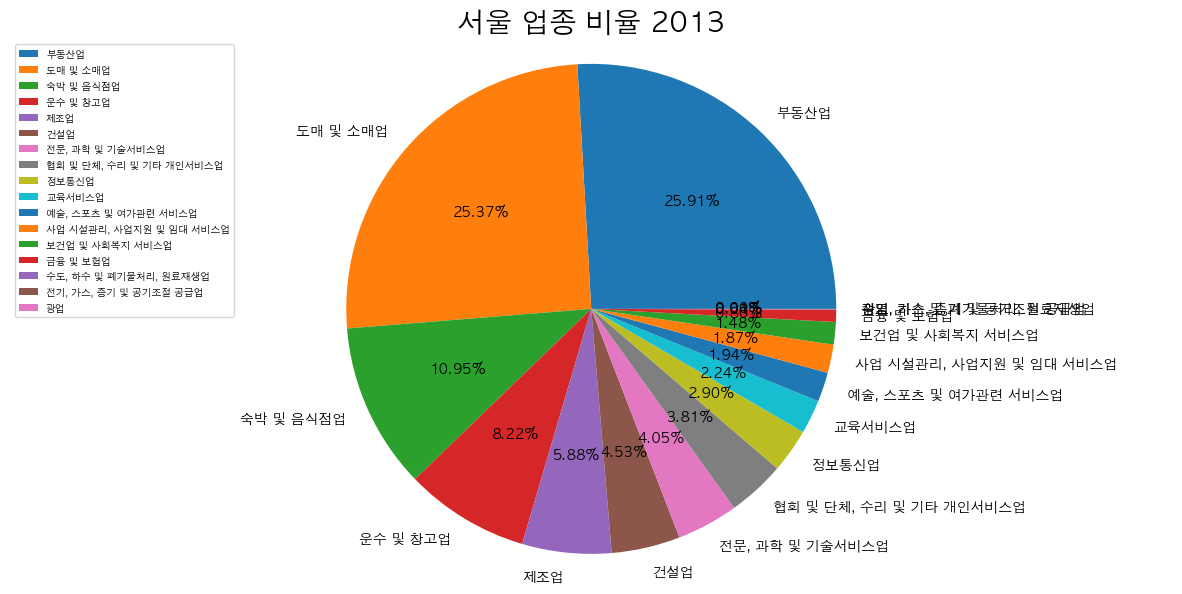

In [8]:
df_seoul2013 = finaldf[(finaldf['지역별'] == '서울') & (finaldf['년도'] == 2013)].sort_values(by='활동')[['산업별', '활동']][::-1]
df_seoul2013.set_index('산업별', drop=True, inplace=True)

df_seoul2013.plot(
    y='활동',
    kind='pie',
    figsize=(15,7),
    autopct='%.2f%%',
)

plt.title('서울 업종 비율 2013', size=20)
plt.axis('equal') #원에 가깝게 만들어줌
plt.rcParams['font.size'] = 10
plt.ylabel('') #ylabel 없애기
plt.legend(loc='upper left', fontsize=7)

plt.show()

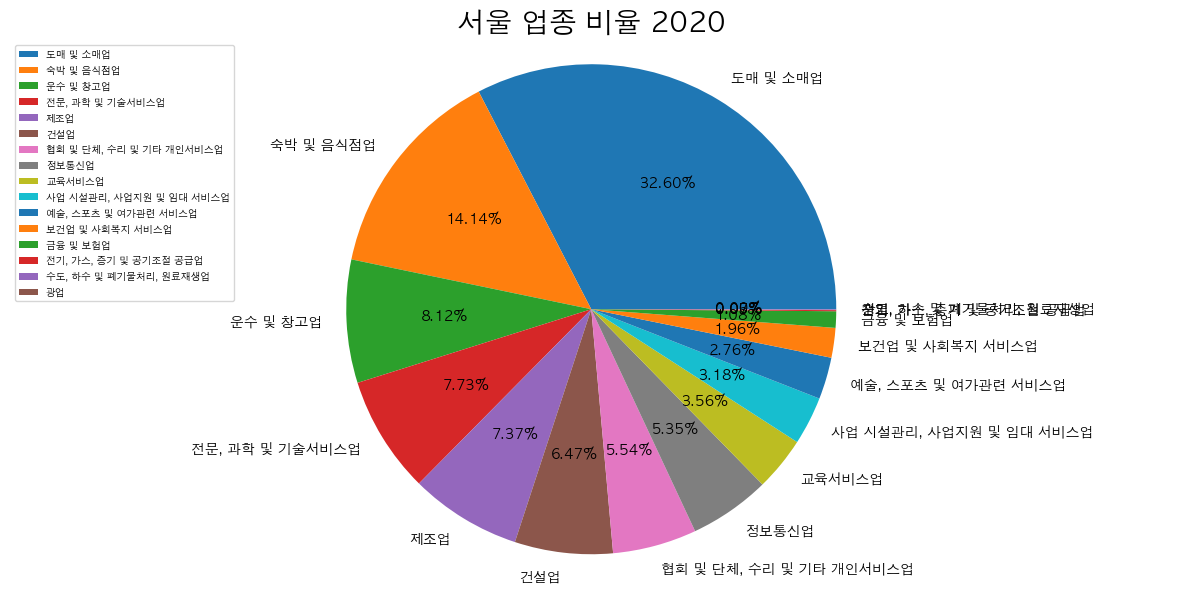

In [9]:
df_seoul = finaldf[(finaldf['지역별'] == '서울') & (finaldf['년도'] == 2020)].sort_values(by='활동')[['산업별', '활동']][::-1].iloc[1:,:]
df_seoul.set_index('산업별', drop=True, inplace=True)

df_seoul.plot(
    y='활동',
    kind='pie',
    figsize=(15,7),
    autopct='%.2f%%',
)

plt.title('서울 업종 비율 2020', size=20)
plt.axis('equal') #원에 가깝게 만들어줌
plt.rcParams['font.size'] = 10
plt.ylabel('') #ylabel 없애기
plt.legend(loc='upper left', fontsize=7)

plt.show()

- 부동산업 > 도매 및 소매 > 숙박 및 음식점

In [10]:
df_seoul

,활동
산업별,
도매 및 소매업,333691
숙박 및 음식점업,144760
운수 및 창고업,83120
"전문, 과학 및 기술서비스업",79148
제조업,75430
건설업,66195
"협회 및 단체, 수리 및 기타 개인서비스업",56747
정보통신업,54756
교육서비스업,36491


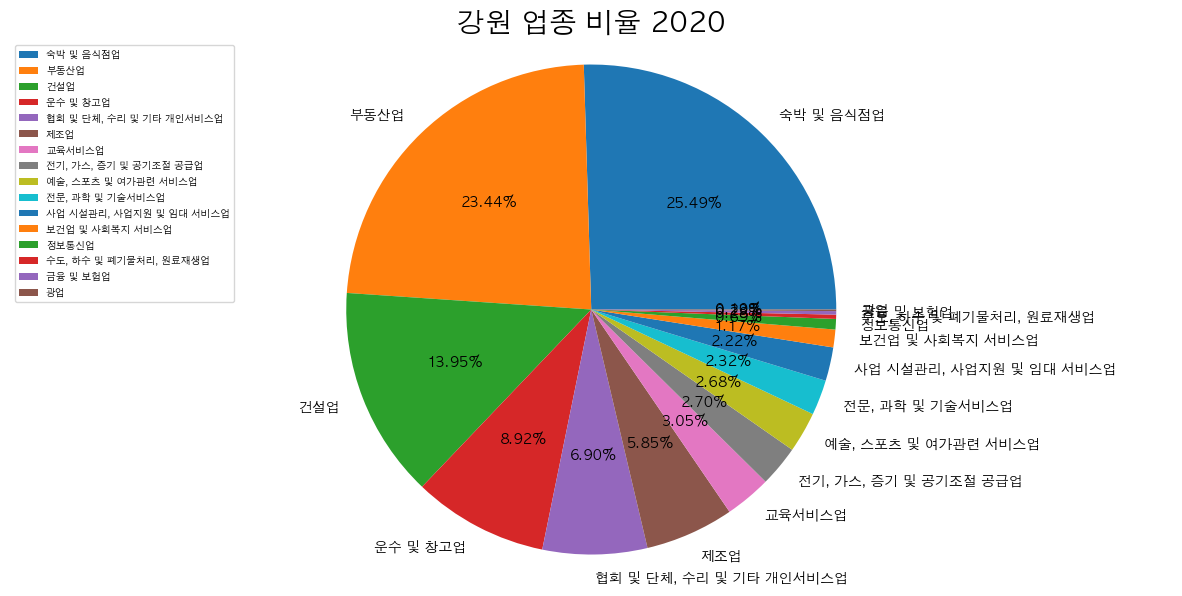

In [11]:
df_seoul = finaldf[(finaldf['지역별'] == '강원') & (finaldf['년도'] == 2020)].sort_values(by='활동')[['산업별', '활동']][::-1].iloc[1:,:]
df_seoul.set_index('산업별', drop=True, inplace=True)

df_seoul.plot(
    y='활동',
    kind='pie',
    figsize=(15,7),
    autopct='%.2f%%',
)

plt.title('강원 업종 비율 2020', size=20)
plt.axis('equal') #원에 가깝게 만들어줌
plt.rcParams['font.size'] = 10
plt.ylabel('') #ylabel 없애기
plt.legend(loc='upper left', fontsize=7)

plt.show()

- 도매 및 소매 > 숙박 및 음식점 > 부동산

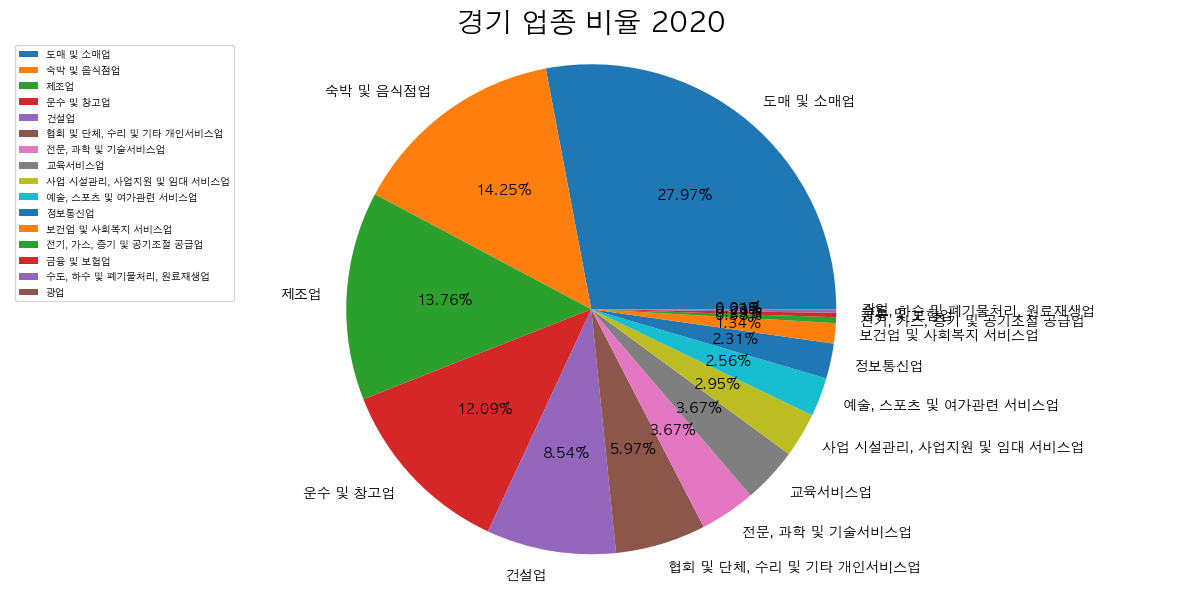

In [12]:
df_seoul = finaldf[(finaldf['지역별'] == '경기') & (finaldf['년도'] == 2020)].sort_values(by='활동')[['산업별', '활동']][::-1].iloc[1:,:]
df_seoul.set_index('산업별', drop=True, inplace=True)

df_seoul.plot(
    y='활동',
    kind='pie',
    figsize=(15,7),
    autopct='%.2f%%',
)

plt.title('경기 업종 비율 2020', size=20)
plt.axis('equal') #원에 가깝게 만들어줌
plt.rcParams['font.size'] = 10
plt.ylabel('') #ylabel 없애기
plt.legend(loc='upper left', fontsize=7)

plt.show()

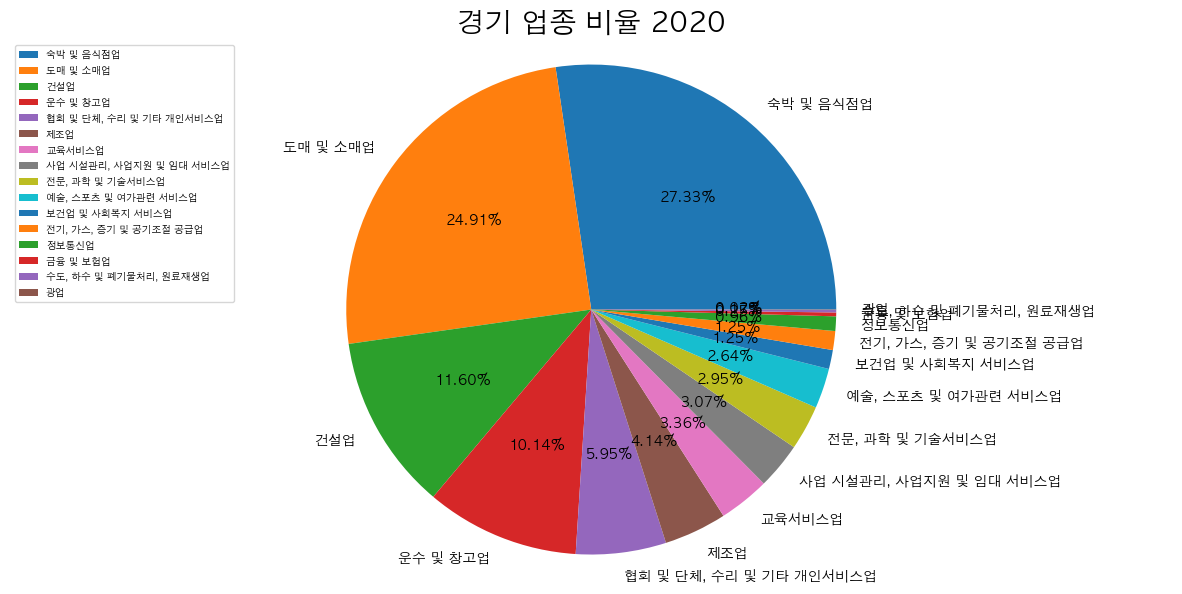

In [13]:
df_seoul = finaldf[(finaldf['지역별'] == '제주') & (finaldf['년도'] == 2020)].sort_values(by='활동')[['산업별', '활동']][::-1].iloc[1:,:]
df_seoul.set_index('산업별', drop=True, inplace=True)

df_seoul.plot(
    y='활동',
    kind='pie',
    figsize=(15,7),
    autopct='%.2f%%',
)

plt.title('경기 업종 비율 2020', size=20)
plt.axis('equal') #원에 가깝게 만들어줌
plt.rcParams['font.size'] = 10
plt.ylabel('') #ylabel 없애기
plt.legend(loc='upper left', fontsize=7)

plt.show()

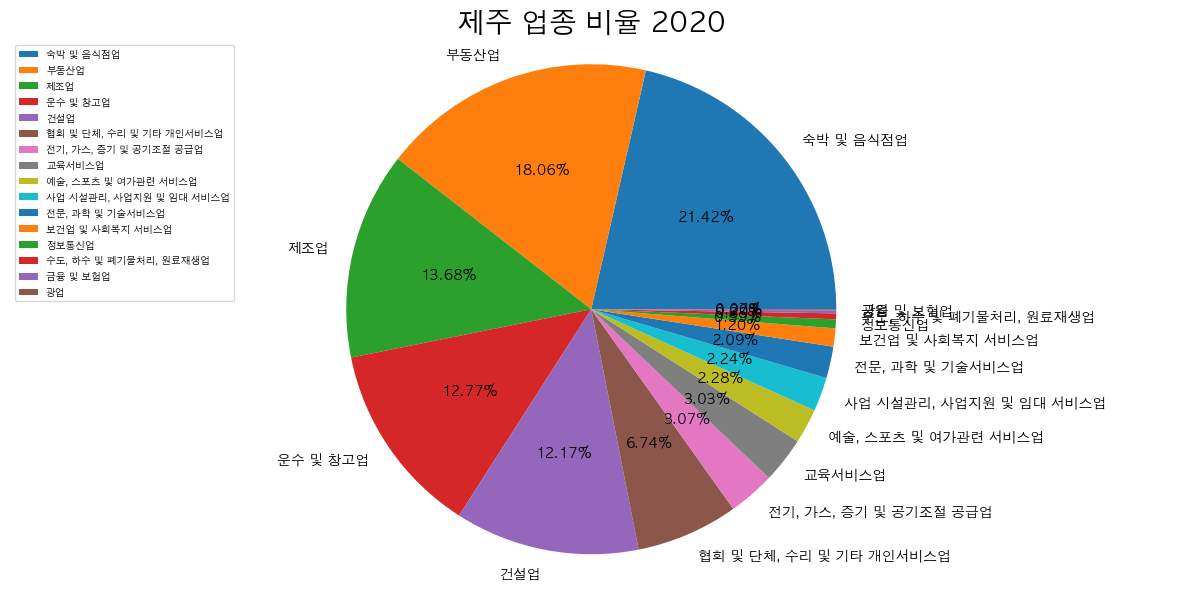

In [14]:
df_seoul = finaldf[(finaldf['지역별'] == '경북') & (finaldf['년도'] == 2020)].sort_values(by='활동')[['산업별', '활동']][::-1].iloc[1:,:]
df_seoul.set_index('산업별', drop=True, inplace=True)

df_seoul.plot(
    y='활동',
    kind='pie',
    figsize=(15,7),
    autopct='%.2f%%',
)

plt.title('제주 업종 비율 2020', size=20)
plt.axis('equal') #원에 가깝게 만들어줌
plt.rcParams['font.size'] = 10
plt.ylabel('') #ylabel 없애기
plt.legend(loc='upper left', fontsize=7)

plt.show()

In [15]:
industries = pd.unique(finaldf['산업별'])
industries

array(['광업', '제조업', '전기, 가스, 증기 및 공기조절 공급업', '수도, 하수 및 폐기물처리, 원료재생업',
       '건설업', '도매 및 소매업', '운수 및 창고업', '숙박 및 음식점업', '정보통신업', '금융 및 보험업',
       '부동산업', '전문, 과학 및 기술서비스업', '사업 시설관리, 사업지원 및 임대 서비스업', '교육서비스업',
       '보건업 및 사회복지 서비스업', '예술, 스포츠 및 여가관련 서비스업',
       '협회 및 단체, 수리 및 기타 개인서비스업'], dtype=object)

In [16]:
dd = finaldf[finaldf['산업별'] == '광업']
dd.drop('산업별', axis=1, inplace=True)
dd.rename(columns={'활동':'광업_활동', '신생':'광업_신생', '소멸':'광업_소멸'}, inplace=True)
dd

,지역별,광업_활동,광업_신생,광업_소멸,년도
19,전국,1662,196,198,2013
20,서울,53,6,4,2013
21,부산,13,1,1,2013
22,대구,12,4,4,2013
23,인천,21,1,1,2013
...,...,...,...,...,...
32,전북,90,9,8,2020
33,전남,528,128,117,2020
34,경북,189,13,20,2020
35,경남,86,11,9,2020


- 년도 > 시도로 쌓기

In [17]:
dd = finaldf[finaldf['산업별'] == '광업']
dd.drop('산업별', axis=1, inplace=True)
dd.drop('년도', axis=1, inplace=True)
dd.rename(columns={'활동':'광업_활동', '신생':'광업_신생', '소멸':'광업_소멸'}, inplace=True)
df = dd.copy()
df

,지역별,광업_활동,광업_신생,광업_소멸
19,전국,1662,196,198
20,서울,53,6,4
21,부산,13,1,1
22,대구,12,4,4
23,인천,21,1,1
...,...,...,...,...
32,전북,90,9,8
33,전남,528,128,117
34,경북,189,13,20
35,경남,86,11,9


In [18]:
dd = finaldf[finaldf['산업별'] == '광업']
dd.drop('산업별', axis=1, inplace=True)
dd.drop('년도', axis=1, inplace=True)
dd.rename(columns={'활동':'광업_활동', '신생':'광업_신생', '소멸':'광업_소멸'}, inplace=True)
df = dd.copy()

dd = finaldf[finaldf['산업별'] == industries[1]]
dd.drop('산업별', axis=1, inplace=True)
dd.rename(columns={'활동':f'{industries[1]}_활동', '신생':f'{industries[1]}_신생', '소멸':f'{industries[1]}_소멸'}, inplace=True)
dd.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
# df = pd.concat([dd, df], axis=1)
df = pd.merge(df, dd, on = '지역별', how = 'inner')
df.reset_index(drop=True, inplace=True)

# ---

dd = finaldf[finaldf['산업별'] == industries[2]]
dd.drop('산업별', axis=1, inplace=True)
dd.drop('년도', axis=1, inplace=True)
dd.rename(columns={'활동':f'{industries[2]}_활동', '신생':f'{industries[2]}_신생', '소멸':f'{industries[2]}_소멸'}, inplace=True)
dd.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
# df = pd.concat([dd, df], axis=1)
df = pd.merge(df, dd, on = '지역별', how = 'inner')
df.reset_index(drop=True, inplace=True)

# ---

dd = finaldf[finaldf['산업별'] == industries[3]]
dd.drop('산업별', axis=1, inplace=True)
dd.drop('년도', axis=1, inplace=True)
dd.rename(columns={'활동':f'{industries[3]}_활동', '신생':f'{industries[3]}_신생', '소멸':f'{industries[3]}_소멸'}, inplace=True)
dd.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
# df = pd.concat([dd, df], axis=1)
df = pd.merge(df, dd, on = '지역별', how = 'inner')
df.reset_index(drop=True, inplace=True)

df

,지역별,광업_활동,광업_신생,광업_소멸,제조업_활동,제조업_신생,제조업_소멸,년도,"전기, 가스, 증기 및 공기조절 공급업_활동","전기, 가스, 증기 및 공기조절 공급업_신생","전기, 가스, 증기 및 공기조절 공급업_소멸","수도, 하수 및 폐기물처리, 원료재생업_활동","수도, 하수 및 폐기물처리, 원료재생업_신생","수도, 하수 및 폐기물처리, 원료재생업_소멸"
0,전국,1662,196,198,488666,52380,41943,2013,4498,1449,159,8539,734,627
1,전국,1662,196,198,488666,52380,41943,2013,4498,1449,159,8676,766,570
2,전국,1662,196,198,488666,52380,41943,2013,4498,1449,159,8724,638,570
3,전국,1662,196,198,488666,52380,41943,2013,4498,1449,159,8846,703,540
4,전국,1662,196,198,488666,52380,41943,2013,4498,1449,159,8997,714,497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73723,제주,18,0,2,3302,383,263,2020,995,290,22,104,17,4
73724,제주,18,0,2,3302,383,263,2020,995,290,22,114,14,10
73725,제주,18,0,2,3302,383,263,2020,995,290,22,116,10,7
73726,제주,18,0,2,3302,383,263,2020,995,290,22,126,19,10


In [19]:
dd = finaldf[finaldf['산업별'] == '광업']
dd.drop('산업별', axis=1, inplace=True)
# dd.drop('년도', axis=1, inplace=True)
dd.rename(columns={'활동':'광업_활동', '신생':'광업_신생', '소멸':'광업_소멸'}, inplace=True)
df = dd.copy()

def makeDf(n):
    global df
    dd = finaldf[finaldf['산업별'] == industries[n+1]]
    dd.drop('산업별', axis=1, inplace=True)
    dd.drop('지역별', axis=1, inplace=True)
    dd.drop('년도', axis=1, inplace=True)
    dd.rename(columns={'활동':f'{industries[n+1]}_활동', '신생':f'{industries[n+1]}_신생', '소멸':f'{industries[n+1]}_소멸'}, inplace=True)
    dd.reset_index(drop=True, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df = pd.concat([dd, df], axis=1)
    # df = pd.merge(df, dd, on = '지역별', how = 'inner')
    df.reset_index(drop=True, inplace=True)
    
for n in range(16):
    print(n)
    makeDf(n)

df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


,"협회 및 단체, 수리 및 기타 개인서비스업_활동","협회 및 단체, 수리 및 기타 개인서비스업_신생","협회 및 단체, 수리 및 기타 개인서비스업_소멸","예술, 스포츠 및 여가관련 서비스업_활동","예술, 스포츠 및 여가관련 서비스업_신생","예술, 스포츠 및 여가관련 서비스업_소멸",보건업 및 사회복지 서비스업_활동,보건업 및 사회복지 서비스업_신생,보건업 및 사회복지 서비스업_소멸,교육서비스업_활동,...,"전기, 가스, 증기 및 공기조절 공급업_신생","전기, 가스, 증기 및 공기조절 공급업_소멸",제조업_활동,제조업_신생,제조업_소멸,지역별,광업_활동,광업_신생,광업_소멸,년도
0,238822,30204,30189,106651,20028,21050,68834,5894,4713,132704,...,1449,159,488666,52380,41943,전국,1662,196,198,2013
1,47929,5870,6229,24426,4488,4716,18641,1666,1389,28184,...,45,9,74080,7362,6401,서울,53,6,4,2013
2,17554,1892,2093,6967,1146,1292,5023,394,280,8354,...,14,1,35083,3208,2694,부산,13,1,1,2013
3,11126,1400,1301,5129,862,929,3773,245,192,6666,...,11,1,29884,2640,1936,대구,12,4,4,2013
4,12099,1931,1769,6050,1218,1283,3263,298,223,5995,...,10,2,30778,3168,2594,인천,21,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11770,1675,1260,3933,713,674,2696,132,94,6035,...,5800,496,14377,1573,1216,전북,90,9,8,2020
140,11167,1733,1342,3663,752,670,2198,101,83,4567,...,3502,378,14892,1720,1310,전남,528,128,117,2020
141,17024,2354,1827,5765,930,983,3021,119,120,7648,...,2617,260,34547,3277,2702,경북,189,13,20,2020
142,21223,3176,2337,6929,1155,1185,4074,197,159,11810,...,1286,130,47130,4090,3648,경남,86,11,9,2020


In [20]:
len(industries) * 3

51

In [21]:
df.columns

Index(['협회 및 단체, 수리 및 기타 개인서비스업_활동', '협회 및 단체, 수리 및 기타 개인서비스업_신생',
       '협회 및 단체, 수리 및 기타 개인서비스업_소멸', '예술, 스포츠 및 여가관련 서비스업_활동',
       '예술, 스포츠 및 여가관련 서비스업_신생', '예술, 스포츠 및 여가관련 서비스업_소멸',
       '보건업 및 사회복지 서비스업_활동', '보건업 및 사회복지 서비스업_신생', '보건업 및 사회복지 서비스업_소멸',
       '교육서비스업_활동', '교육서비스업_신생', '교육서비스업_소멸', '사업 시설관리, 사업지원 및 임대 서비스업_활동',
       '사업 시설관리, 사업지원 및 임대 서비스업_신생', '사업 시설관리, 사업지원 및 임대 서비스업_소멸',
       '전문, 과학 및 기술서비스업_활동', '전문, 과학 및 기술서비스업_신생', '전문, 과학 및 기술서비스업_소멸',
       '부동산업_활동', '부동산업_신생', '부동산업_소멸', '금융 및 보험업_활동', '금융 및 보험업_신생',
       '금융 및 보험업_소멸', '정보통신업_활동', '정보통신업_신생', '정보통신업_소멸', '숙박 및 음식점업_활동',
       '숙박 및 음식점업_신생', '숙박 및 음식점업_소멸', '운수 및 창고업_활동', '운수 및 창고업_신생',
       '운수 및 창고업_소멸', '도매 및 소매업_활동', '도매 및 소매업_신생', '도매 및 소매업_소멸', '건설업_활동',
       '건설업_신생', '건설업_소멸', '수도, 하수 및 폐기물처리, 원료재생업_활동',
       '수도, 하수 및 폐기물처리, 원료재생업_신생', '수도, 하수 및 폐기물처리, 원료재생업_소멸',
       '전기, 가스, 증기 및 공기조절 공급업_활동', '전기, 가스, 증기 및 공기조절 공급업_신생',
       '전기, 가스, 증기 및 공기조절 공급업_소멸', '제조업_활동', '제조업_신

In [22]:
# df.to_csv("../../Data/companies/정제_업종_전부(2013~2020).csv", encoding='utf-8', index=False)